# Netfilx Data: Analysis and visualization

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from wordcloud import WordCloud
import plotly.express as px

In [2]:
data=pd.read_csv(r"C:\Users\Yemul\3D Objects\DataInfoSec\netflix_titles.csv")
data.shape

(6234, 12)

In [3]:
data.head(3)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...

In [4]:
data.describe(include="all")

show_id   type        title                director  \
count   6.234000e+03   6234         6234                    4265   
unique           NaN      2         6172                    3301   
top              NaN  Movie  The Silence  Raúl Campos, Jan Suter   
freq             NaN   4265            3                      18   
mean    7.670368e+07    NaN          NaN                     NaN   
std     1.094296e+07    NaN          NaN                     NaN   
min     2.477470e+05    NaN          NaN                     NaN   
25%     8.003580e+07    NaN          NaN                     NaN   
50%     8.016337e+07    NaN          NaN                     NaN   
75%     8.024489e+07    NaN          NaN                     NaN   
max     8.123573e+07    NaN          NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223    6234.00000   
unique                5469            554             1524           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2032              122           NaN   
mean                   NaN            NaN              NaN    2013.35932   
std                    NaN            NaN              NaN       8.81162   
min                    NaN            NaN              NaN    1925.00000   
25%                    NaN            NaN              NaN    2013.00000   
50%                    NaN            NaN              NaN    2016.00000   
75%                    NaN            NaN              NaN    2018.00000   
max                    NaN            NaN              NaN    2020.00000   

       rating  duration      listed_in  \
count    6224      6234           6234   
unique     14       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2027      1321            299   
mean      NaN       NaN            NaN   
std       NaN       NaN            NaN   
min       NaN       NaN            NaN   
25%       NaN       NaN            NaN   
50%       NaN       NaN            NaN   
75%       NaN       NaN            NaN   
max       NaN       NaN            NaN   

                                              description  
count                                                6234  
unique                                               6226  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [5]:
Null_Values=data.isna().mean().round(4) * 100
Null_Values

show_id          0.00
type             0.00
title            0.00
director        31.58
cast             9.14
country          7.64
date_added       0.18
release_year     0.00
rating           0.16
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [6]:
netflix_shows=data[data["type"]=="TV Show"]
netflix_movies=data[data["type"]=="Movie"]

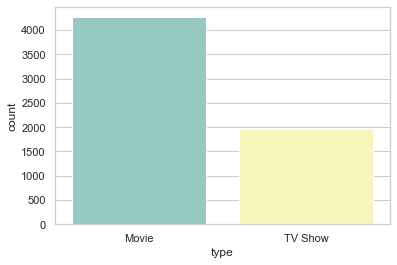

In [7]:
# Total number Movies and TV Shows
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=data, palette="Set3")

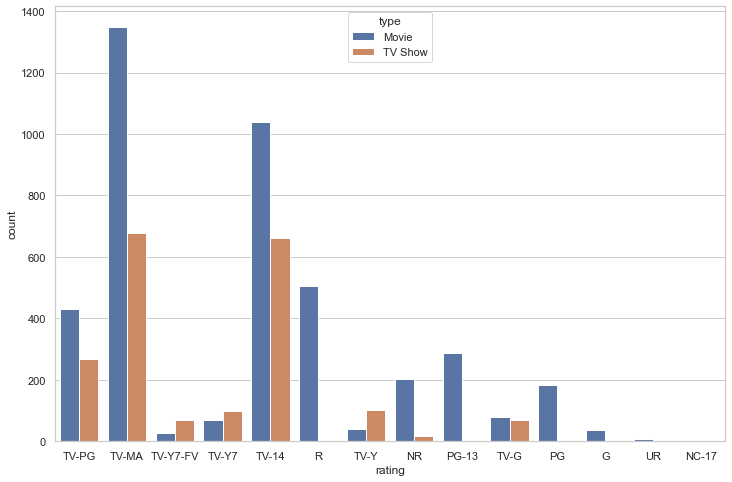

In [8]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data,hue='type')

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added

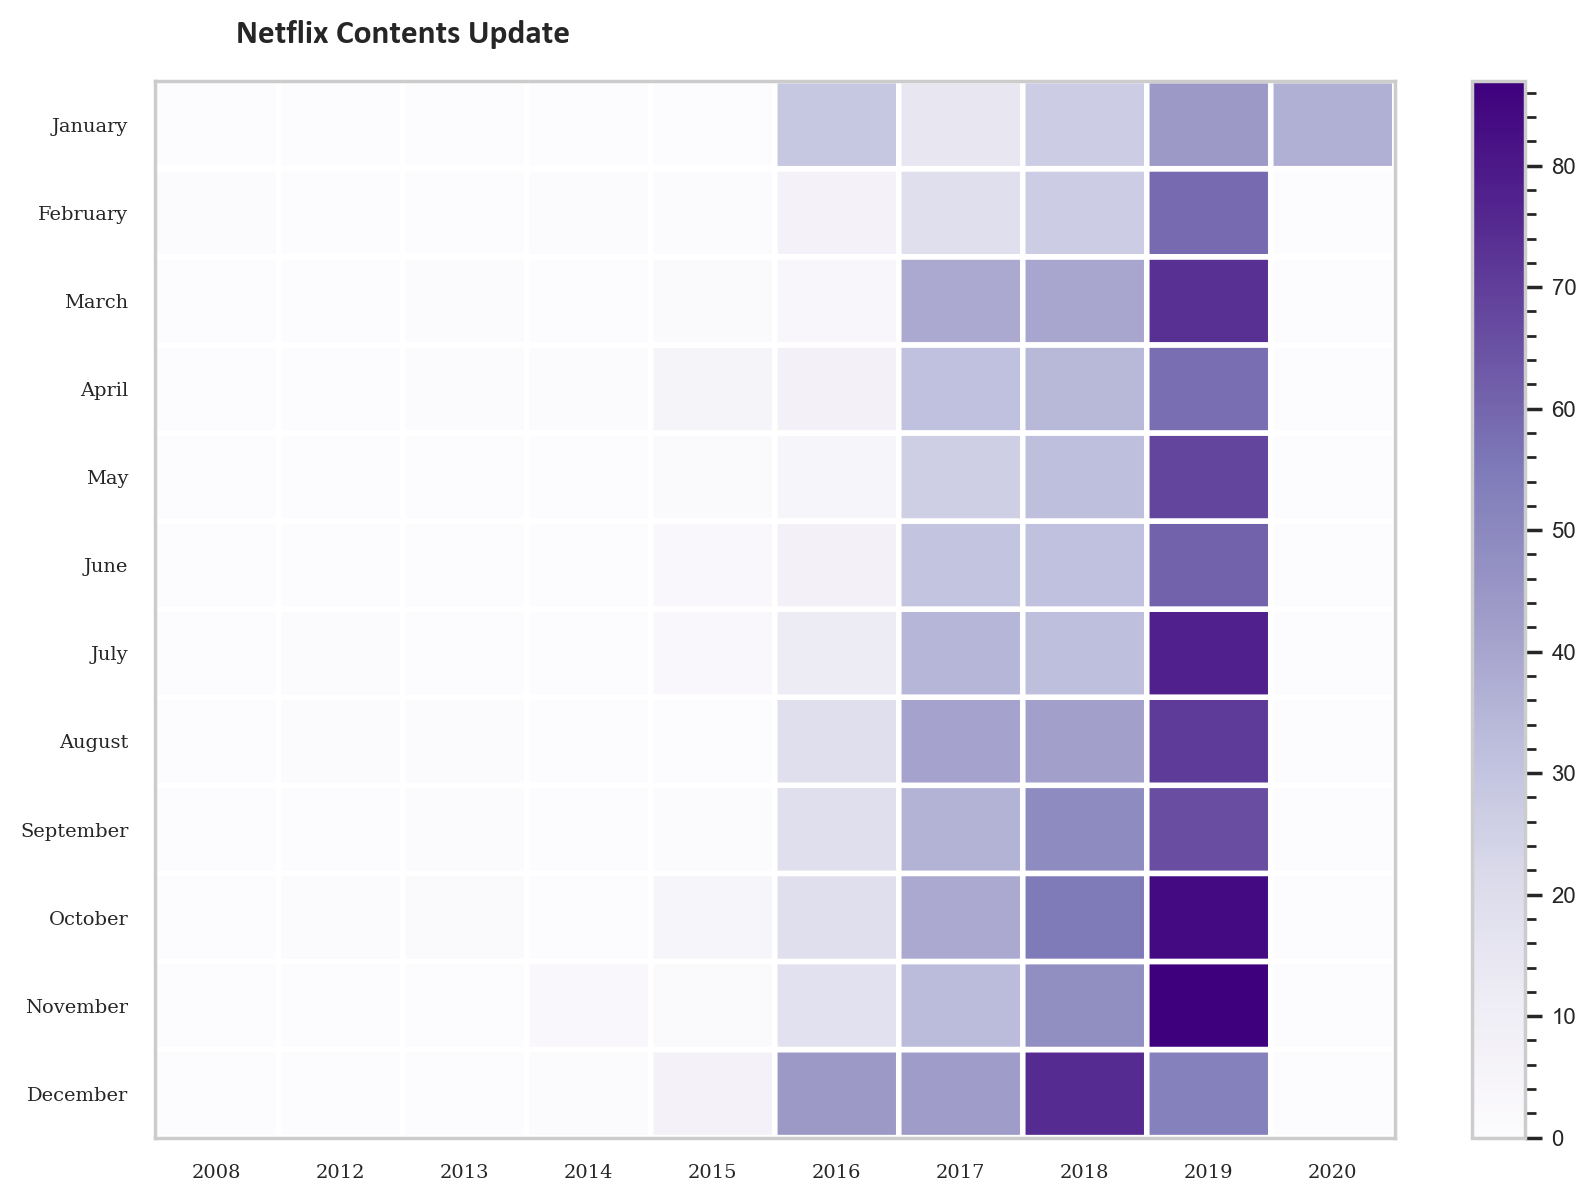

In [9]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='Purples', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# Movie ratings analysis

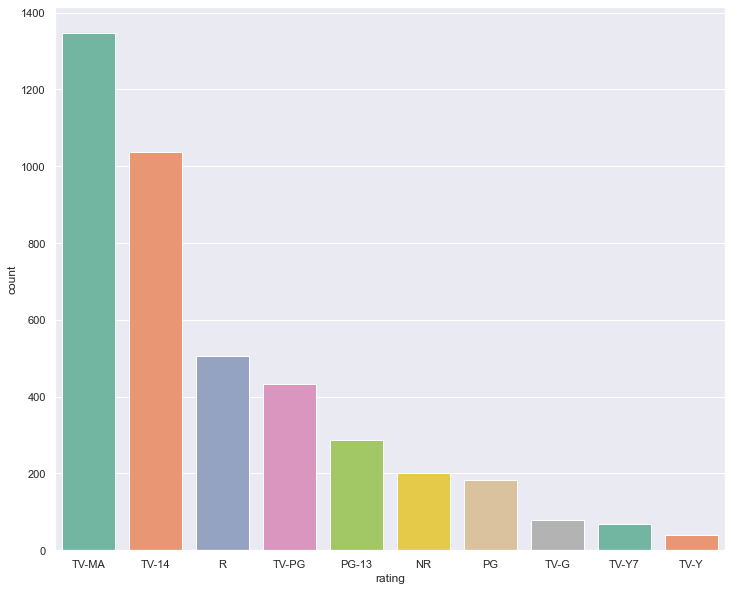

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ay=sns.countplot(x="rating",data=netflix_movies,palette="Set2",order=netflix_movies["rating"].value_counts().index[0:10])


The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# Show Rating Analysis

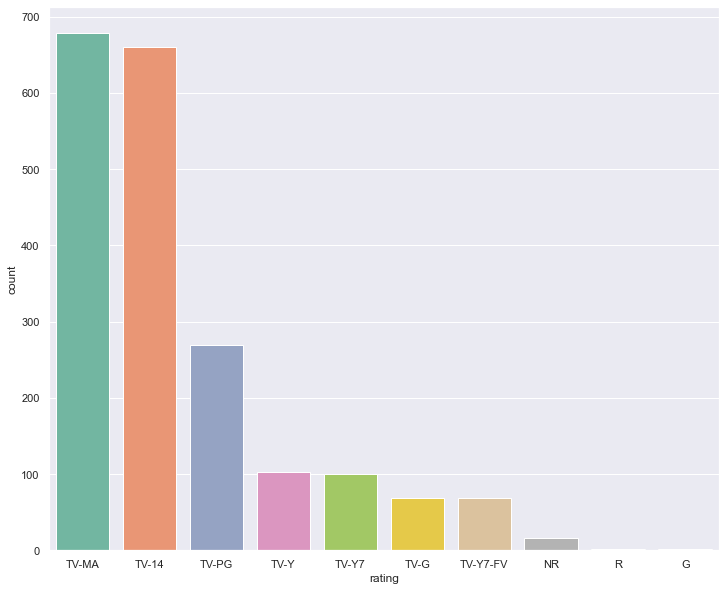

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:10])


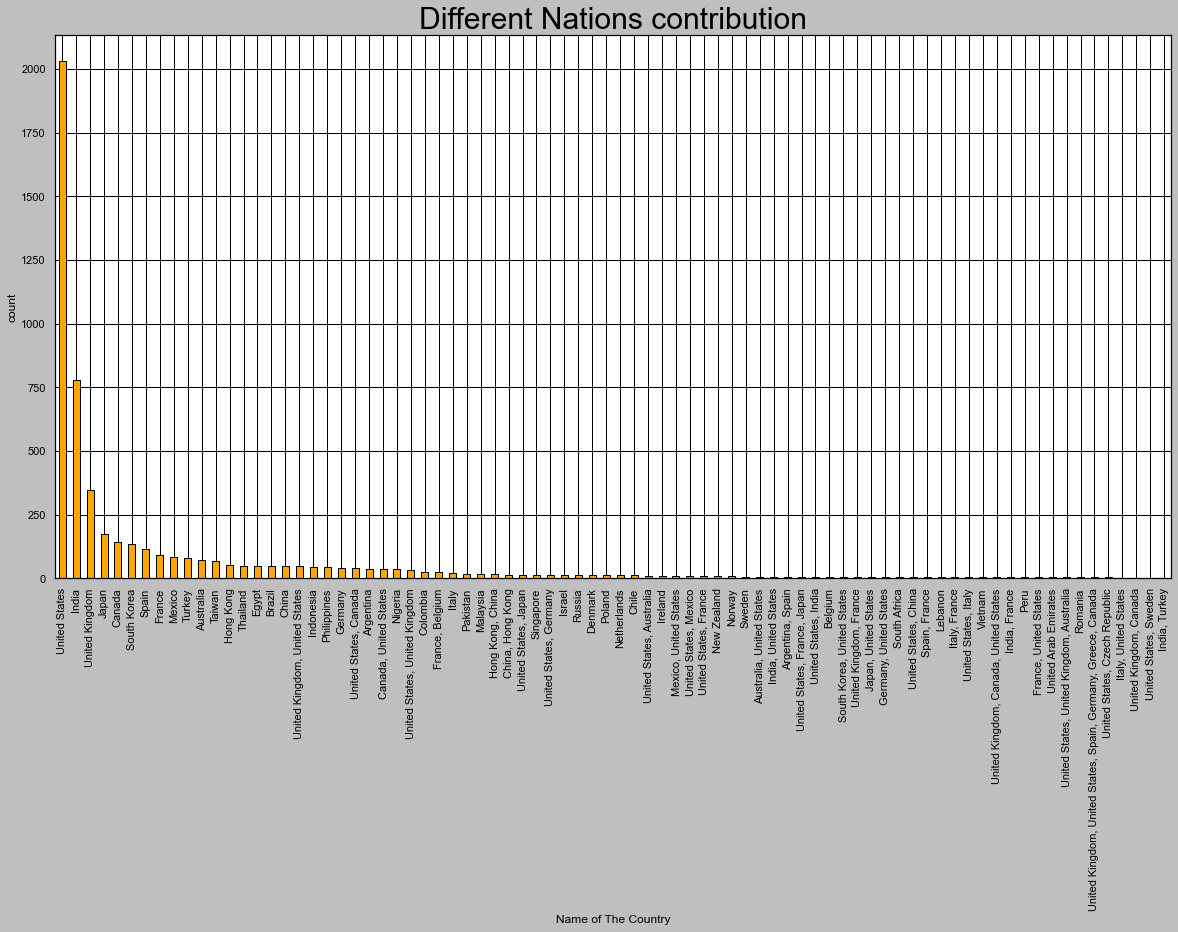

In [12]:
# To show Different nations contribution in Netflix

plt.style.use('grayscale')
data['country'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 10))
plt.title('Different Nations contribution', fontsize = 30, fontweight = 30)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

In [13]:
 #oldest movies available on netflix
old = data.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

title  release_year
4292                 Pioneers: First Women Filmmakers*          1925
2011                                    Prelude to War          1942
2013                              The Battle of Midway          1942
2022     Undercover: How to Operate Behind Enemy Lines          1943
2023                Why We Fight: The Battle of Russia          1943
2026                   WWII: Report from the Aleutians          1943
2017  The Memphis Belle: A Story of a\nFlying Fortress          1944
2019                                 The Negro Soldier          1944
2021                                  Tunisian Victory          1944
2012                                        San Pietro          1945
2009                          Nazi Concentration Camps          1945
2005                           Know Your Enemy - Japan          1945
2930                                      The Stranger          1946
4079               Pioneers of African-American Cinema          1946
2006                                Let There Be Light          1946

In [14]:
#standup shows on Netflix
hshtg = "Stand-Up Comedy"
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if hshtg.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  \
53                              Marc Maron: Too Real  United States   
113                                Def Comedy Jam 25  United States   
126                      Jeff Dunham: Beside Himself  United States   
134                Iliza Shlesinger: Confirmed Kills  United States   
181                            Jerry Before Seinfeld  United States   
202  Sebastian Maniscalco: What's Wrong with People?  United States   
210      Cedric the Entertainer: Live from the Ville  United States   
260                        Norm Macdonald Has a Show  United States   
288                   Jeff Dunham: Relative Disaster  United States   
289                         Daniel Sloss: Live Shows  United States   

     release_year  
53           2017  
113          2017  
126          2019  
134          2016  
181          2017  
202          2012  
210          2016  
260          2018  
288          2017  
289          2018

In [15]:
tag1 = "Kids' TV" #Kids TV shows on Netflix
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if tag1.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  release_year
2                  Transformers Prime  United States          2013
3    Transformers: Robots in Disguise  United States          2016
64                             Ben 10  United States          2016
70                      We Bare Bears  United States          2017
175        Kulipari: An Army of Frogs  United States          2016
203            The Last Kids on Earth  United States          2019
328  Transformers Rescue Bots Academy  United States          2019
375  LEGO Elves: Secrets of Elvendale  United States          2017
434             StoryBots Super Songs  United States          2016
458                      Raising Dion  United States          2019

In [16]:
df_countries = pd.DataFrame(data.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

country count
0   United States  2032
1           India   777
2  United Kingdom   348
3           Japan   176
4          Canada   141

In [17]:
fig = px.choropleth(   #distribution of content on basis of countries
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"]
)
fig.show()

In [18]:
date = pd.DataFrame(data.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

Year  Count
0  2018   1063
1  2017    959
2  2019    843
3  2016    830
4  2015    517

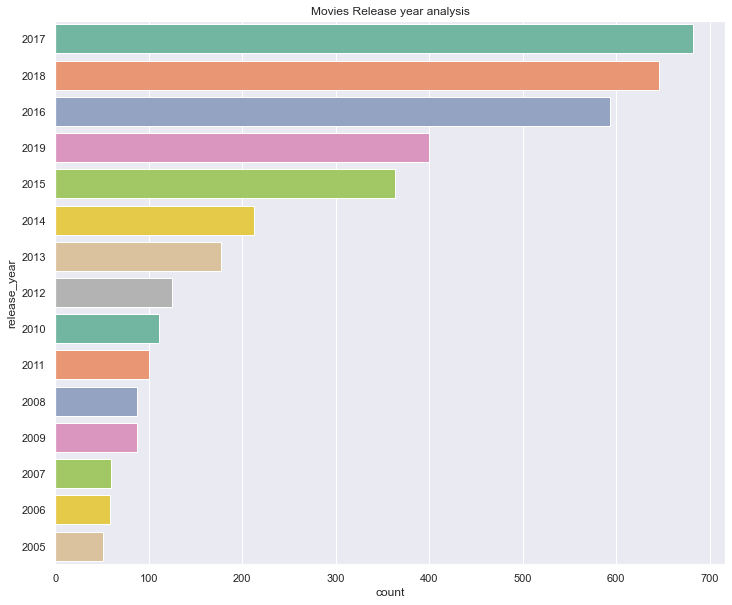

In [30]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2",
            order=netflix_movies['release_year'].value_counts().index[0:15]).set_title("Movies Release year analysis")


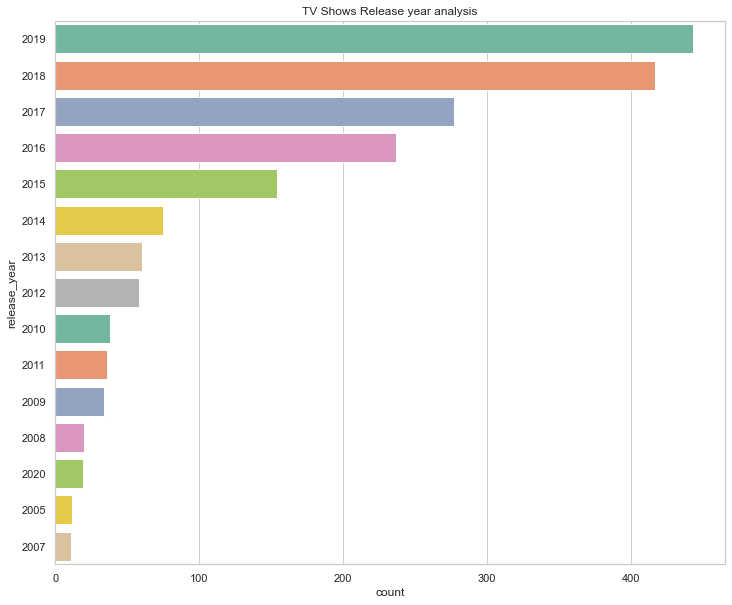

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15]).set_title("TV Shows Release year analysis")



Text(0.5, 1.0, 'Top 10 Genres of Movies')

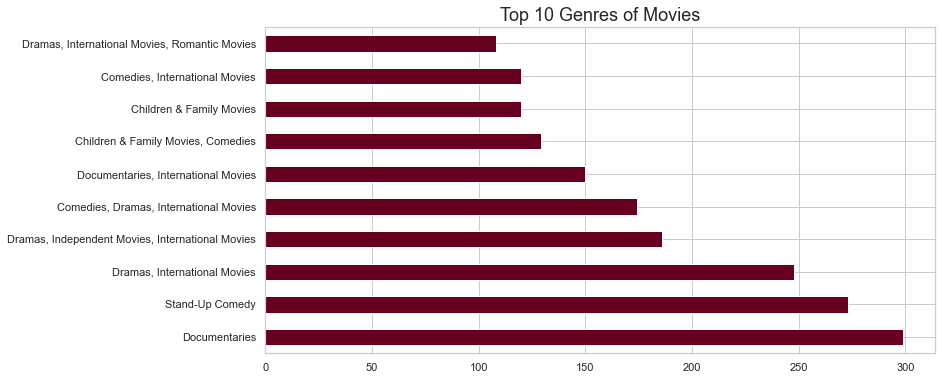

In [21]:
plt.figure(figsize=(12,6))
a=data[data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",colormap="RdBu")
plt.title("Top 10 Genres of Movies",size=18)



Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

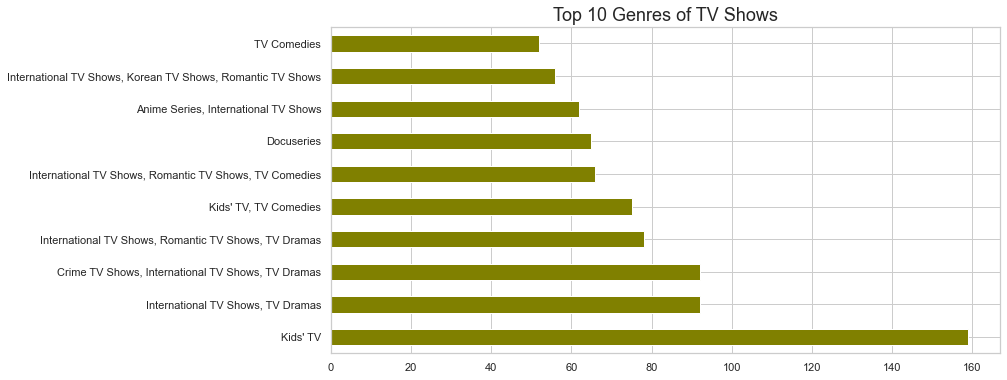

In [22]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="olive")
plt.title("Top 10 Genres of TV Shows",size=18)

Text(0.5, 1.0, 'Top 10 director of Movies')

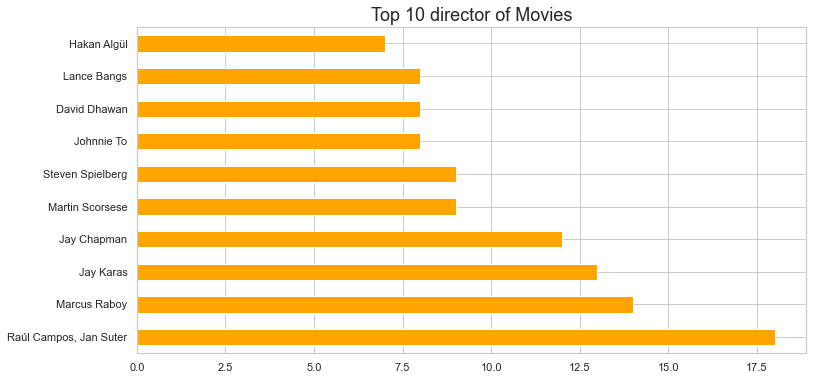

In [23]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["director"].value_counts()[:10].plot(kind="barh",color="orange")
plt.title("Top 10 director of Movies",size=18)

Text(0.5, 1.0, 'Top 10 director of TV Show')

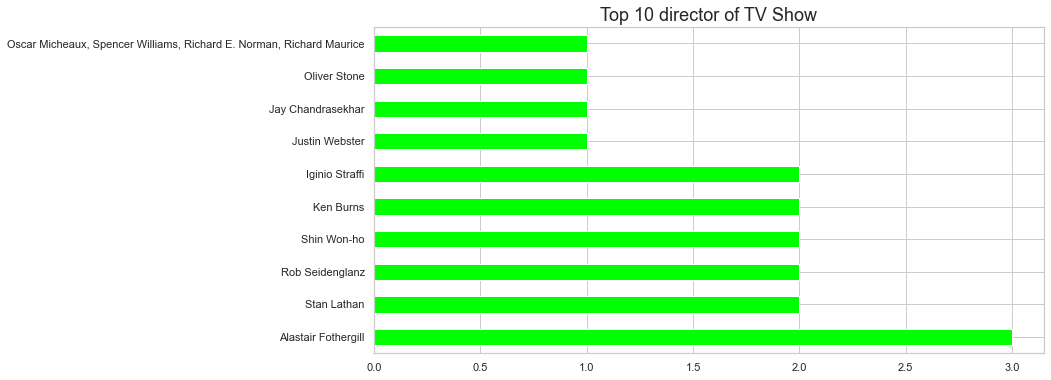

In [24]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["director"].value_counts()[:10].plot(kind="barh",color="lime")
plt.title("Top 10 director of TV Show",size=18)

Text(0.5, 1.0, 'Top 10 cast of Movies')

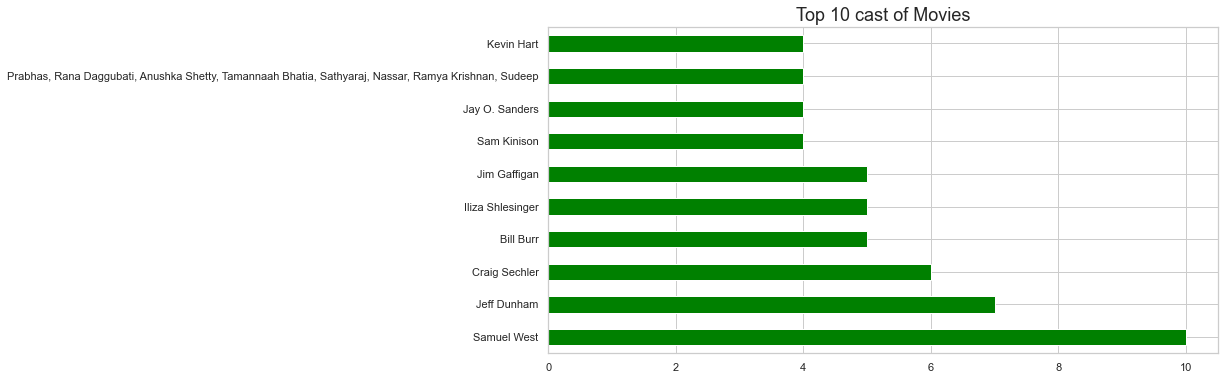

In [25]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["cast"].value_counts()[:10].plot(kind="barh",color="green")
plt.title("Top 10 cast of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Movies')

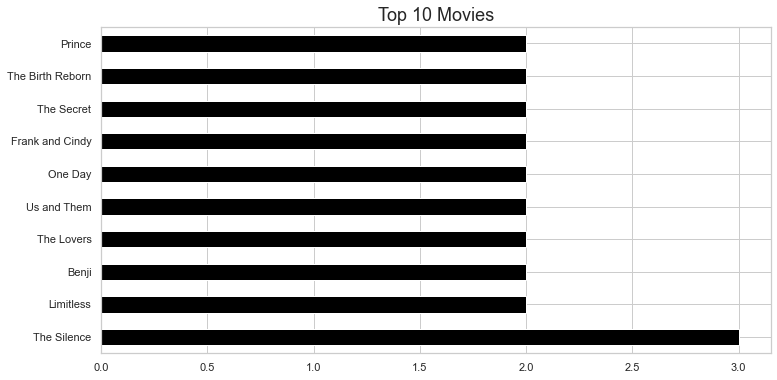

In [26]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["title"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Movies",size=18)

Text(0.5, 1.0, 'Top 10 country contribution in Movies')

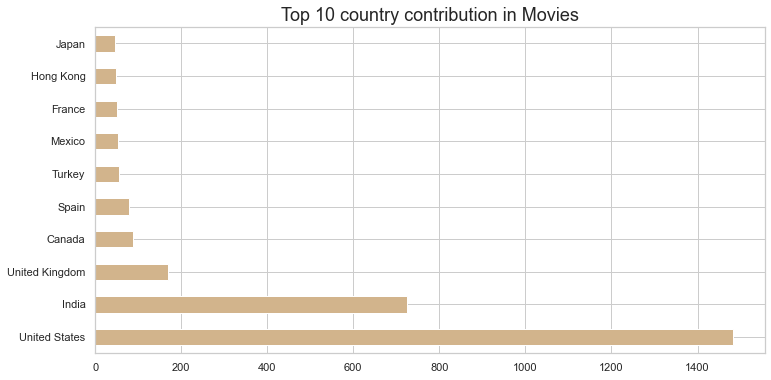

In [27]:
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["country"].value_counts()[:10].plot(kind="barh",color="tan")
plt.title("Top 10 country contribution in Movies",size=18)

Text(0.5, 1.0, 'Top 10 country contribution in TV Shows')

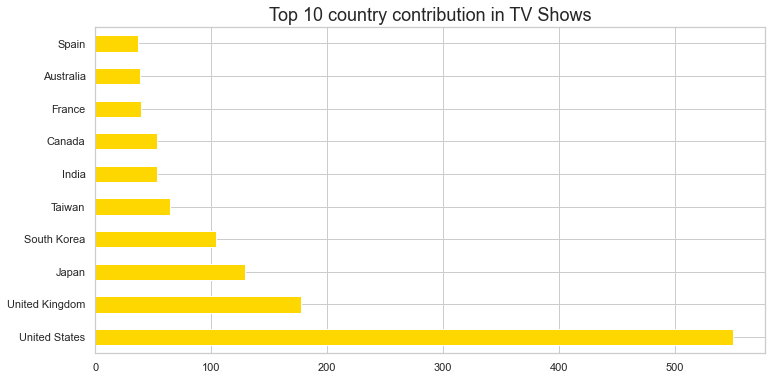

In [28]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["country"].value_counts()[:10].plot(kind="barh",color="gold")
plt.title("Top 10 country contribution in TV Shows",size=18)

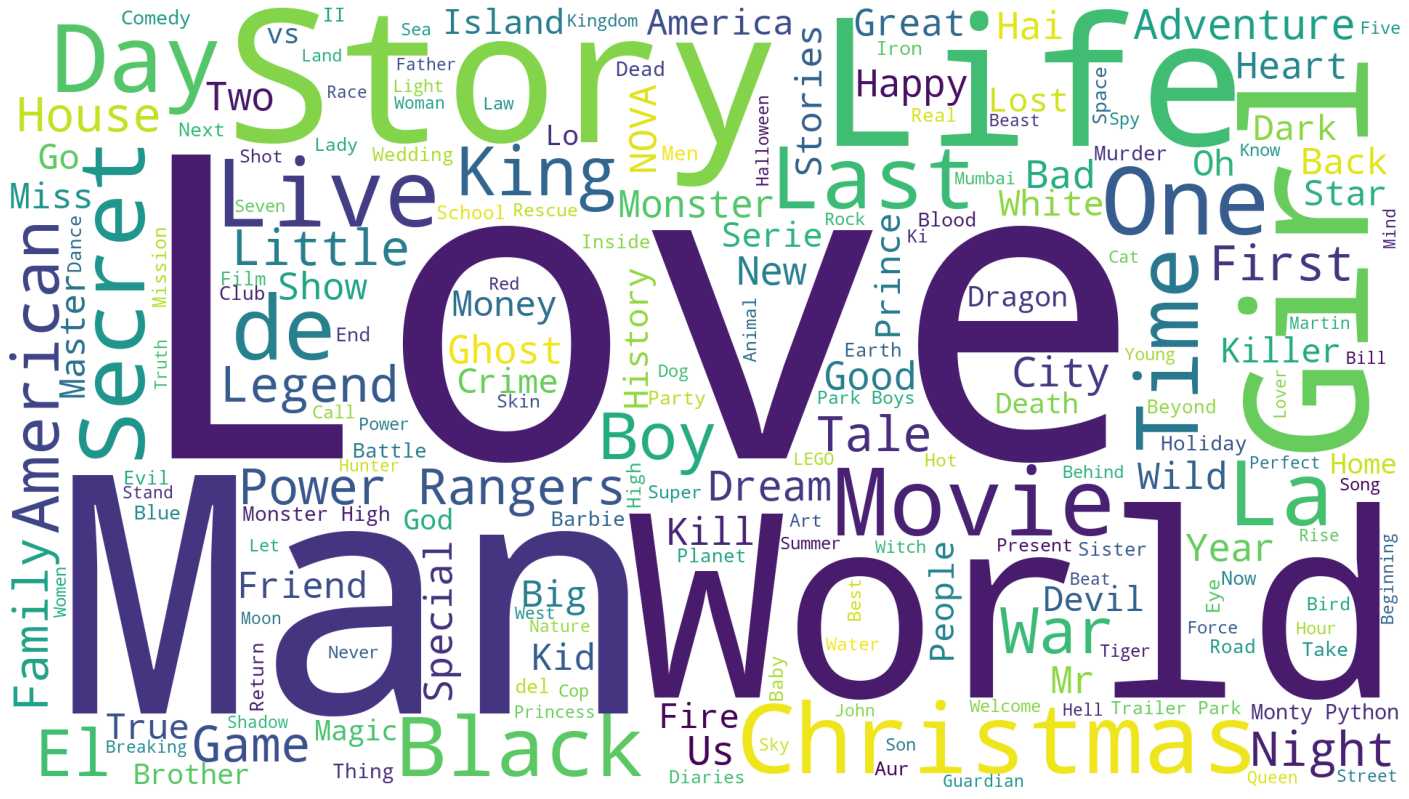

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# plt.savefig('cast.png')


End